In [1]:
!date

Fri Oct 23 11:14:31 PDT 2020


# Scatter plot of correlations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/trackfig')
from trackfig.utils import get_notebook_name
from trackfig.trackfig import trackfig 

TRACKFIG = "/home/sina/projects/mop/BYVSTZP_2020/trackfig.txt"
NB = get_notebook_name()

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [12]:
tvm = np.array(
    [0.7921444158185055,
     0.7577133744111573,
     0.8355333876586635,
     0.4376861471951722,
     0.7768667940090835,
     0.8914118229015247,
     0.8980376879672993,
     0.8535492803061333,
     0.8347604493356554,
     0.885285096757754,
     0.9029529394527941,
     0.856814503483428,
     0.6224264131127573,
     0.8368220223374623,
     0.9011701921410472,
     0.3169404799062017,
     0.8606436651620778])

    
svm = np.array(
    [0.5603222275508296,
     0.6496069144954573,
     0.7820752907848809,
     0.4382881498595573,
     0.7656392114133692,
     0.8541842713888791,
     0.808893407121526,
     0.8004600458202673,
     0.7291220376622998,
     0.8789746186046652,
     0.8845497565028714,
     0.8625655492899029,
     0.6482002027225622,
     0.8408586805067313,
     0.8223515323593641,
     0.6902258942533921,
     0.7981647746280334])


labels = [
        'Astro',
        'Endo',
        'L2/3 IT',
        'L5 IT',
        'L5 PT',
        'L5/6 NP',
        'L6 CT',
        'L6 IT',
        'L6 IT Car3',
        'L6b',
        'Lamp5',
        'Pvalb',
        'SMC',
        'Sncg',
        'Sst',
        'VLMC',
        'Vip'
]

In [13]:
def yex(ax):
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

In [14]:
cluster_cmap = {
"Astro": (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939,
"Endo" : (0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252,
"SMC"  : (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b,
"VLMC" : (0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c,
"Low Quality" : (0,0,0),
"L2/3 IT" : (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
"L5 PT" : (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
"L5 IT" : (0.5176470588235295,  0.23529411764705882, 0.2235294117647059 ),  # 843c39
"L5/6 NP": "#D43F3A",
"L6 CT" : (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),  # d6616b
"L6 IT" : (0.9058823529411765,  0.5882352941176471,  0.611764705882353  ),  # e7969c
"L6b" : (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
"L6 IT Car3" : (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
"Lamp5" : (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd # blues
"Sncg" : (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
"Vip" : (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
"Sst" : (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
"Pvalb":(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
}

In [15]:
len(labels)

17

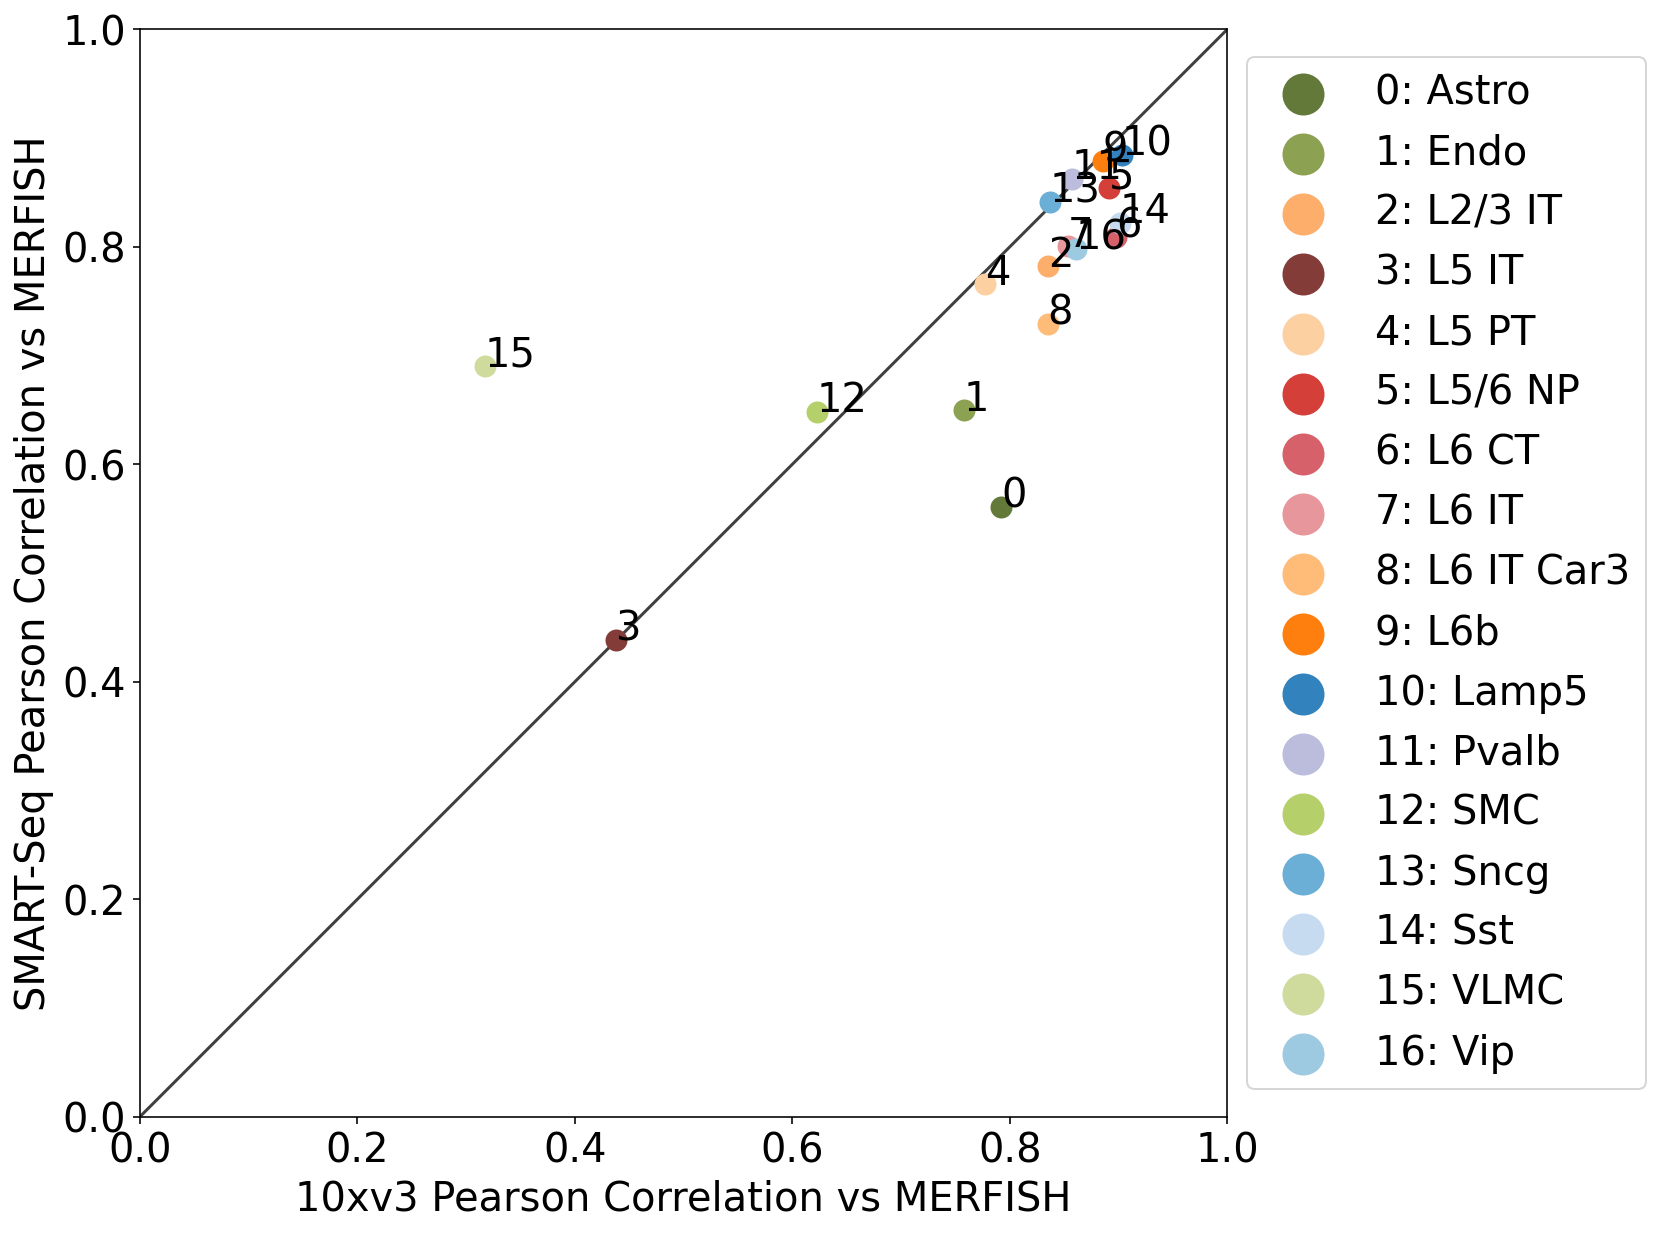

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

x = tvm
y = svm

for lidx, l in enumerate(labels):
    ax.scatter(x[lidx], y[lidx], color=cluster_cmap[l], label="{}: {}".format(lidx, l), s=100)
    ax.annotate(lidx, xy=(x[lidx], y[lidx]))
ax.set_ylim(0,1)
yex(ax)

ax.set_xlabel("10xv3 Pearson Correlation vs MERFISH")
ax.set_ylabel("SMART-Seq Pearson Correlation vs MERFISH")


ax.legend(bbox_to_anchor=(1,0.5), loc="center left", markerscale=2)
plt.savefig(trackfig("../../figures/merfish-updated_v_all_correlation.png", TRACKFIG, NB), bbox_inches='tight',dpi=300)

plt.show()

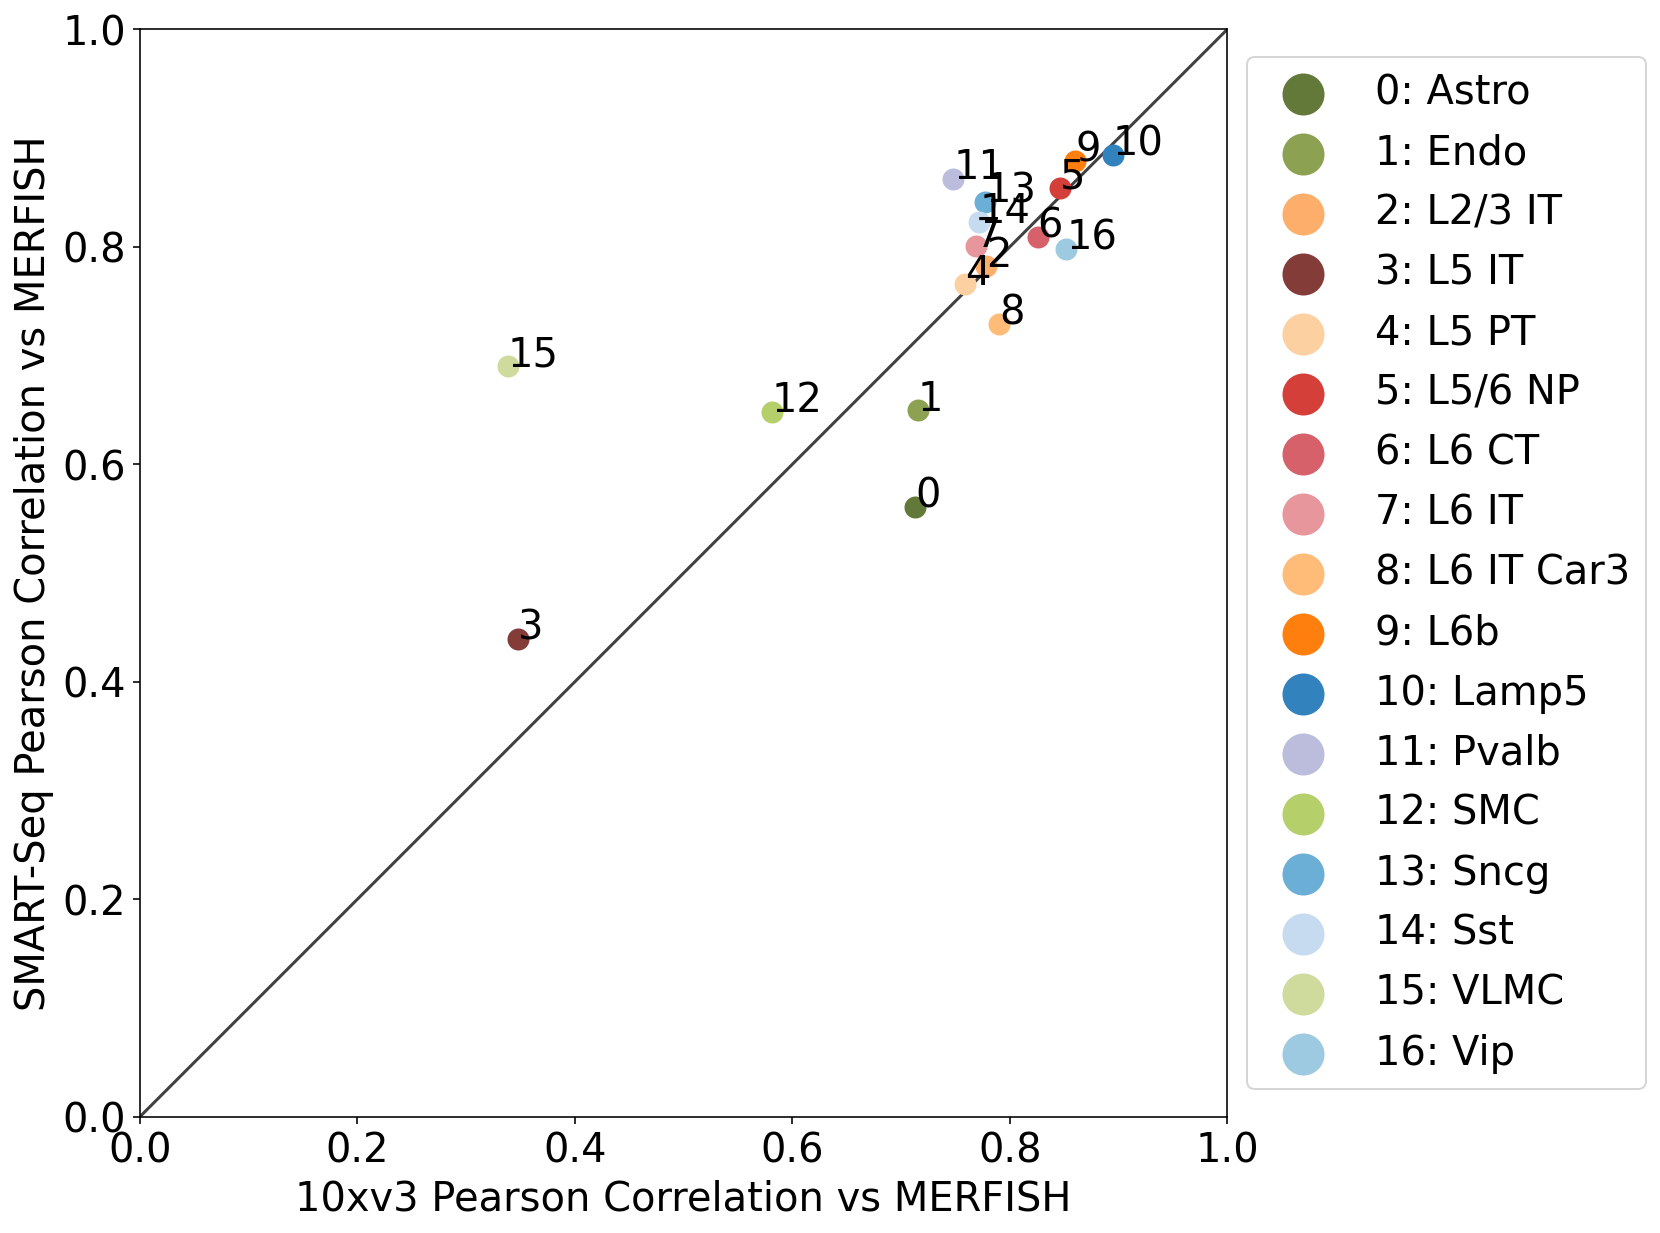

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

x = tvm
y = svm

for lidx, l in enumerate(labels):
    ax.scatter(x[lidx], y[lidx], color=cluster_cmap[l], label="{}: {}".format(lidx, l), s=100)
    ax.annotate(lidx, xy=(x[lidx], y[lidx]))
ax.set_ylim(0,1)
yex(ax)

ax.set_xlabel("10xv3 Pearson Correlation vs MERFISH")
ax.set_ylabel("SMART-Seq Pearson Correlation vs MERFISH")


ax.legend(bbox_to_anchor=(1,0.5), loc="center left", markerscale=2)
plt.savefig(trackfig("../../figures/merfish-updated_v_all_correlation.png", TRACKFIG, NB), bbox_inches='tight',dpi=300)

plt.show()